# C964 Capstone Project
## Used Car Price Prediction for a Car Dealership
#### Chelsie Conrad #001130463

**Use the following input fields to get an estimated car price for your vehicle:**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline

In [7]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import ipywidgets as widgets
from IPython.display import display

# Path to car dataset
car_data_file_path = '../input/usedcarscatalog/cars.csv'

car_data = pd.read_csv('./cars.csv')

# Assign the prediction target
y = car_data.price_usd

# Choose features
car_features = ['transmission', 'year_produced', 'odometer_value']

# Assign the data we'll be using to predict car prices to X
X = pd.get_dummies(car_data[car_features])

# Split the data so it can be used to validate the model
# Variables starting with train_ are use to fit the model
# Variables starting with val_ are used to validate the model
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

# Specify model
# max_leaf_nodes controls the trees depth
# the value was chosen as a sweet spot between underfitting and overfitting
# Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
# Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.
car_price_prediction_model = DecisionTreeRegressor(max_leaf_nodes=110, random_state=1)

# Fit model
car_price_prediction_model.fit(train_X, train_y)

# UI
mileage_input = widgets.BoundedFloatText(
    value=0.0,
    min=0,
    max=1000000000.0,
    step=1000.0,
    description='Mileage:',
    disabled=False
)

year_input = widgets.BoundedIntText(
    min=0,
    max=2022,
    step=1,
    description='Year:',
    disabled=False
)

is_automatic_input = widgets.Checkbox(
    value=False,
    description='Is this car automatic?:',
    disabled=False,
    indent=False
)
caption = widgets.Label(value='Please enter details about your vehicle')
display(year_input)
display(mileage_input)
display(is_automatic_input)
display(caption)
def on_value_change(change):
    customer_data = [[year_input.value, mileage_input.value, is_automatic_input.value, not is_automatic_input.value]]
    customer_df = pd.DataFrame(customer_data, columns = [
        'year_produced', 'odometer_value', 'transmission_automatic','transmission_mechanical'
    ])
    customer_prediction = car_price_prediction_model.predict(customer_df)
    caption.value = 'Your car from ' + str(year_input.value) + ' with ' + str(mileage_input.value) + ' miles has an estimated value of ' + str(customer_prediction[0])

year_input.observe(on_value_change, names='value')
mileage_input.observe(on_value_change, names='value')
is_automatic_input.observe(on_value_change, names='value')

BoundedIntText(value=0, description='Year:', max=2022)

BoundedFloatText(value=0.0, description='Mileage:', max=1000000000.0, step=1000.0)

Checkbox(value=False, description='Is this car automatic?:', indent=False)

Label(value='Please enter details about your vehicle')

**Deep dive into the data**

The following table shows some basic statistical details for the features that were inputted into the model, including different measures of center such as mean, median, and mode.<br>
**Features** are the columns represented in the table and are the input to the model used to make predictions.

In [8]:
train_X.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,year_produced,odometer_value,transmission_automatic,transmission_mechanical
count,28898,28898,28898,28898
mean,2002.96,248263,0.334106,0.665894
std,8.04658,135396,0.471685,0.471685
min,1956,0,0,0
25%,1998,157000,0,0
50%,2003,250000,0,1
75%,2009,323539,1,1
max,2019,1e+06,1,1


<AxesSubplot:xlabel='year_produced', ylabel='price_usd'>

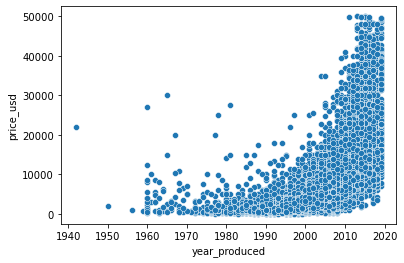

In [9]:
import seaborn as sns
sns.scatterplot(x=car_data['year_produced'], y=car_data['price_usd'])

The pie chart belows shows the portion of the cars in the sample data that had an automatic or mechanical transmission.

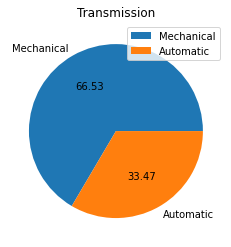

In [10]:
X['transmission_automatic'].value_counts().head(10).plot.pie(title = "Transmission", autopct="%.2f", labels = (["Mechanical", "Automatic"]))

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')
plt.legend()
plt.ylabel("")
plt.show() 

**Model Validation**

In [11]:
# Model Validation
# the relevant measure of model quality is predictive accuracy
# There are many metrics for summarizing model quality, one of which is called Mean Absolute Error (also called MAE)
# error = actual − predicted
# MAE can be thought of as: "On average, our predictions are off by about X."

# Get predictions to validate the model
val_predictions = car_price_prediction_model.predict(val_X)

val_mae = mean_absolute_error(val_y, val_predictions)
string_mae = "{:.2f}".format(val_mae)
print('The Mean Absolute Error of this model is $' + string_mae + '. This means that, on average, predictions generated by this model are off by about $' + string_mae)

The Mean Absolute Error of this model is $2229.81. This means that, on average, predictions generated by this model are off by about $2229.81
